In [131]:
import numpy as np
import pandas_datareader as web
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from matplotlib.pyplot import figure
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from tensorflow import keras
'''from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout'''

'from keras.models import Sequential\nfrom keras.layers import Dense\nfrom keras.layers import LSTM\nfrom keras.layers import Dropout'

In [132]:
Sequential = keras.models.Sequential
Dense = keras.layers.Dense
LSTM = keras.layers.LSTM
Dropout = keras.layers.Dropout

In [133]:
df = web.DataReader("BBDC4.SA", data_source="yahoo", start="2015-01-01", end="2019-12-31")
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,16.833435,16.188368,16.482443,16.269001,16646325.0,12.181644
2015-01-05,16.491928,15.799429,15.989155,16.292715,16428748.0,12.206099
2015-01-06,16.828691,16.193110,16.321175,16.828691,21831909.0,12.607638
2015-01-07,17.691944,16.895096,17.046877,17.497477,23002650.0,13.108670
2015-01-08,17.744120,17.217630,17.549650,17.587597,12495706.0,13.176188
...,...,...,...,...,...,...
2019-12-20,32.663635,32.236362,32.572727,32.445454,24617120.0,30.705662
2019-12-23,32.654545,32.254543,32.445454,32.645454,11294690.0,30.894934
2019-12-26,33.172726,32.563637,32.663635,33.054546,11498850.0,31.282085


In [134]:
df.shape

(1241, 6)

In [135]:
df_bovespa = web.DataReader("^BVSP", data_source="yahoo", start="2015-01-01", end="2019-12-31")
# df_bovespa.reset_index(inplace=True,drop=False)
df_bovespa

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,50005.0,48345.0,50005.0,48512.0,2882100.0,48512.0
2015-01-05,48512.0,47264.0,48512.0,47517.0,3866100.0,47517.0
2015-01-06,48061.0,47338.0,47517.0,48001.0,4559300.0,48001.0
2015-01-07,49882.0,48006.0,48006.0,49463.0,4408800.0,49463.0
2015-01-08,50261.0,49017.0,49463.0,49943.0,3621900.0,49943.0
...,...,...,...,...,...,...
2019-12-20,115171.0,114526.0,115133.0,115121.0,6887400.0,115121.0
2019-12-23,115863.0,114964.0,115119.0,115863.0,3995200.0,115863.0
2019-12-26,117220.0,115673.0,115864.0,117203.0,3788900.0,117203.0


In [136]:
df_bovespa.shape

(1235, 6)

In [137]:
df = df.merge(df_bovespa, left_on='Date', right_on='Date', suffixes=('', '_bovespa'))
df.describe()

,High,Low,Open,Close,Volume,Adj Close,High_bovespa,Low_bovespa,Open_bovespa,Close_bovespa,Volume_bovespa,Adj Close_bovespa
count,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,22.158142,21.585978,21.885802,21.888026,1.827563e+07,18.436567,71258.726316,69996.229960,70605.106883,70656.285020,3.794215e+06,70656.285020
std,6.636685,6.516990,6.588668,6.586653,8.797424e+06,6.482696,19634.810008,19447.130086,19532.433000,19564.626768,1.203582e+06,19564.626768
min,9.858160,9.636181,9.687407,9.681715,0.000000e+00,7.666900,38031.000000,37046.000000,37501.000000,37497.000000,0.000000e+00,37497.000000
25%,17.130830,16.574933,16.846336,16.821578,1.252091e+07,12.956546,53498.500000,52677.000000,53087.500000,53094.500000,3.078600e+06,53094.500000
50%,20.711245,20.247932,20.510895,20.488979,1.676645e+07,17.113239,66758.000000,65842.000000,66195.000000,66235.000000,3.658900e+06,66235.000000
75%,27.056474,26.388085,26.825068,26.773416,2.210809e+07,23.004204,86157.000000,84582.500000,85515.000000,85539.000000,4.389100e+06,85539.000000
max,36.309090,35.472729,36.000000,35.827271,8.762744e+07,31.879570,117803.000000,115995.000000,117205.000000,117203.000000,1.104670e+07,117203.000000


In [138]:
df['MA3'] = df['Close'].rolling(window=3, min_periods=0).mean()
df['MA7'] = df['Close'].rolling(window=7, min_periods=0).mean()
df['MA20'] = df['Close'].rolling(window=20, min_periods=0).mean()
df['MA30'] = df['Close'].rolling(window=30, min_periods=0).mean()
df['MA60'] = df['Close'].rolling(window=60, min_periods=0).mean()

cma3 = df['Close'].expanding(min_periods=3).mean()
df['CMA3'] = cma3.fillna(df['MA3'])

df['ST3'] = df['Close'].rolling(window=3, min_periods=0).std(ddof=0)
df['ST7'] = df['Close'].rolling(window=7, min_periods=0).std(ddof=0)
df['ST20'] = df['Close'].rolling(window=20, min_periods=0).std(ddof=0)
df['ST30'] = df['Close'].rolling(window=30, min_periods=0).std(ddof=0)
df['ST60'] = df['Close'].rolling(window=60, min_periods=0).std(ddof=0)

df['UPPER3'] = df['MA3'] + (df['ST3'] * 2) 
df['LOWER3'] = df['MA3'] - (df['ST3'] * 2)

df['UPPER7'] = df['MA7'] + (df['ST7'] * 2)
df['LOWER7'] = df['MA7'] - (df['ST7'] * 2)

df['UPPER20'] = df['MA20'] + (df['ST20'] * 2)
df['LOWER20'] = df['MA20'] - (df['ST20'] * 2)

df['UPPER30'] = df['MA30'] + (df['ST30'] * 2)
df['LOWER30'] = df['MA30'] - (df['ST30'] * 2)

df['UPPER60'] = df['MA60'] + (df['ST60'] * 2)
df['LOWER60'] = df['MA60'] - (df['ST60'] * 2)

In [139]:
data = df.filter(["Close", "Volume", "Close_bovespa", "Volume_bovespa", 'MA3', 'MA7', 'MA20', 'MA30', 'MA60', 'CMA3', 'ST3', 'ST7', 'ST20', 'ST30', 'ST60', 'UPPER3', 'LOWER3', 'UPPER7', 'LOWER7', 'UPPER20', 'LOWER20', 'UPPER30', 'LOWER30', 'UPPER60', 'LOWER60'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .7)
training_data_len
dataset.shape
data

,Close,Volume,Close_bovespa,Volume_bovespa,MA3,MA7,MA20,MA30,MA60,CMA3,...,UPPER3,LOWER3,UPPER7,LOWER7,UPPER20,LOWER20,UPPER30,LOWER30,UPPER60,LOWER60
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,16.269001,16646325.0,48512.0,2882100.0,16.269001,16.269001,16.269001,16.269001,16.269001,16.269001,...,16.269001,16.269001,16.269001,16.269001,16.269001,16.269001,16.269001,16.269001,16.269001,16.269001
2015-01-05,16.292715,16428748.0,47517.0,3866100.0,16.280858,16.280858,16.280858,16.280858,16.280858,16.280858,...,16.304572,16.257144,16.304572,16.257144,16.304572,16.257144,16.304572,16.257144,16.304572,16.257144
2015-01-06,16.828691,21831909.0,48001.0,4559300.0,16.463469,16.463469,16.463469,16.463469,16.463469,16.463469,...,16.980334,15.946604,16.980334,15.946604,16.980334,15.946604,16.980334,15.946604,16.980334,15.946604
2015-01-07,17.497477,23002650.0,49463.0,4408800.0,16.872961,16.721971,16.721971,16.721971,16.721971,16.721971,...,17.858635,15.887287,17.723091,15.720851,17.723091,15.720851,17.723091,15.720851,17.723091,15.720851
2015-01-08,17.587597,12495706.0,49943.0,3621900.0,17.304588,16.895096,16.895096,16.895096,16.895096,16.895096,...,17.981619,16.627558,18.027063,15.763129,18.027063,15.763129,18.027063,15.763129,18.027063,15.763129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-20,32.445454,24617120.0,115121.0,6887400.0,32.706060,32.010389,31.240908,31.057878,31.188636,21.852318,...,33.319112,32.093008,33.329737,30.691041,32.853098,29.628718,32.620890,29.494866,33.195667,29.181605
2019-12-23,32.645454,11294690.0,115863.0,3995200.0,32.742424,32.162337,31.344090,31.077575,31.209696,21.861078,...,33.322979,32.161869,33.494190,30.830484,33.036497,29.651684,32.703940,29.451210,33.250627,29.168765
2019-12-26,33.054546,11498850.0,117203.0,3788900.0,32.715151,32.364935,31.500454,31.141817,31.237878,21.870157,...,33.222147,32.208156,33.745674,30.984195,33.218039,29.782869,32.916457,29.367177,33.332524,29.143233


In [140]:
sc = MinMaxScaler(feature_range = (0, 1))
scaled_data = sc.fit_transform(dataset)

In [141]:
scaled_data

array([[0.25194668, 0.18996704, 0.13819537, ..., 0.31508875, 0.14708467,
        0.36495497],
       [0.25285369, 0.18748406, 0.12571199, ..., 0.31459451, 0.14856078,
        0.3644426 ],
       [0.2733534 , 0.24914467, 0.13178431, ..., 0.30165012, 0.1766032 ,
        0.35102326],
       ...,
       [0.89395046, 0.13122431, 1.        , ..., 0.86106623, 0.85517761,
        0.92128794],
       [0.88908257, 0.13060293, 0.99160665, ..., 0.85901763, 0.85833702,
        0.92100975],
       [0.887344  , 0.09358998, 0.98445537, ..., 0.85840149, 0.86117205,
        0.92160621]])

In [142]:
train_data = scaled_data[0:training_data_len,:]
# print(train_data)
window = 60
X_train = []
y_train = []
for i in range(window, len(train_data)):
    X_train.append(train_data[i-window:i,:])
    y_train.append(train_data[i, 0:1])
    # if i <= (window + 1):
    #   print(X_train)
    #   print(y_train)
    #   print()
X_train, y_train = np.array(X_train), np.array(y_train)

In [143]:
X_train.shape

(805, 60, 25)

In [144]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], -1))

In [145]:
X_train.shape

(805, 60, 25)

In [146]:
# Inicializar a RNN
regressor = Sequential()

# Adicionar a primeira camada LSTM e Dropout 
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))
 
# Adicionar a segunda camada LSTM e Dropout
regressor.add(LSTM(units = 80, return_sequences = True))
regressor.add(Dropout(0.2))
 
# Adicionar a terceira camada LSTM e Dropout
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
 
# camada de saída
regressor.add(Dense(units = 1))
 
# Compilar a rede
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
# regressor.compile(loss = 'mean_squared_error')

# Visualizar a rede
regressor.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 60, 100)           50400     
_________________________________________________________________
dropout_15 (Dropout)         (None, 60, 100)           0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 60, 80)            57920     
_________________________________________________________________
dropout_16 (Dropout)         (None, 60, 80)            0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 50)                26200     
_________________________________________________________________
dropout_17 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [174]:
history = regressor.fit(X_train, y_train, epochs = 20, batch_size = 1)

Epoch 1/20
805/805 [==============================] - 20s 24ms/step - loss: 6.4942e-04
Epoch 2/20
805/805 [==============================] - 23s 29ms/step - loss: 6.3877e-04
Epoch 3/20
805/805 [==============================] - 23s 29ms/step - loss: 6.9222e-04
Epoch 4/20
805/805 [==============================] - 23s 29ms/step - loss: 6.7382e-04
Epoch 5/20
805/805 [==============================] - 23s 29ms/step - loss: 5.9929e-04
Epoch 6/20
805/805 [==============================] - 24s 29ms/step - loss: 5.9477e-04
Epoch 7/20
805/805 [==============================] - 24s 30ms/step - loss: 6.3606e-04
Epoch 8/20
805/805 [==============================] - 24s 30ms/step - loss: 6.1510e-04
Epoch 9/20
805/805 [==============================] - 24s 30ms/step - loss: 6.7179e-04
Epoch 10/20
805/805 [==============================] - 24s 30ms/step - loss: 6.7920e-04
Epoch 11/20
805/805 [==============================] - 24s 30ms/step - loss: 6.6049e-04
Epoch 12/20
805/805 [====================

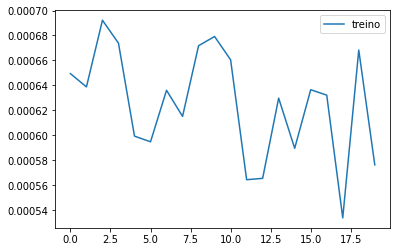

In [175]:
plt.plot(history.history['loss'], label='treino')
plt.legend()

In [176]:
test_data = scaled_data[training_data_len - window:, :]

X_test = []
y_test = dataset[training_data_len:, 0:1]

for i in range(window, len(test_data)): 
    X_test.append(test_data[i-window:i,:])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], -1))
print(X_test.shape, X_train.shape)

(370, 60, 25) (805, 60, 25)


In [177]:
predicted = regressor.predict(X_test)
volume = dataset[training_data_len:, 1:]
predicted = np.column_stack((predicted, volume))
# print(dataset[:,1:])
print(predicted.shape)
predicted = sc.inverse_transform(predicted)
print(predicted)

(370, 25)
[[2.00883365e+01 1.72070357e+15 5.79968518e+09 ... 4.40011036e+02
  7.00843910e+02 4.30790133e+02]
 [2.04241897e+01 1.14063901e+15 5.80582254e+09 ... 4.40290395e+02
  6.97508234e+02 4.28611301e+02]
 [2.04327850e+01 1.51833045e+15 5.87181911e+09 ... 4.41611021e+02
  6.93656534e+02 4.27699384e+02]
 ...
 [2.75187915e+01 1.00761478e+15 9.34181982e+09 ... 7.13238012e+02
  8.15966983e+02 6.82233863e+02]
 [2.66878046e+01 1.00284346e+15 9.28849650e+09 ... 7.12058971e+02
  8.17801669e+02 6.82084884e+02]
 [2.64256387e+01 7.18637009e+14 9.24306408e+09 ... 7.11704356e+02
  8.19447994e+02 6.82404300e+02]]


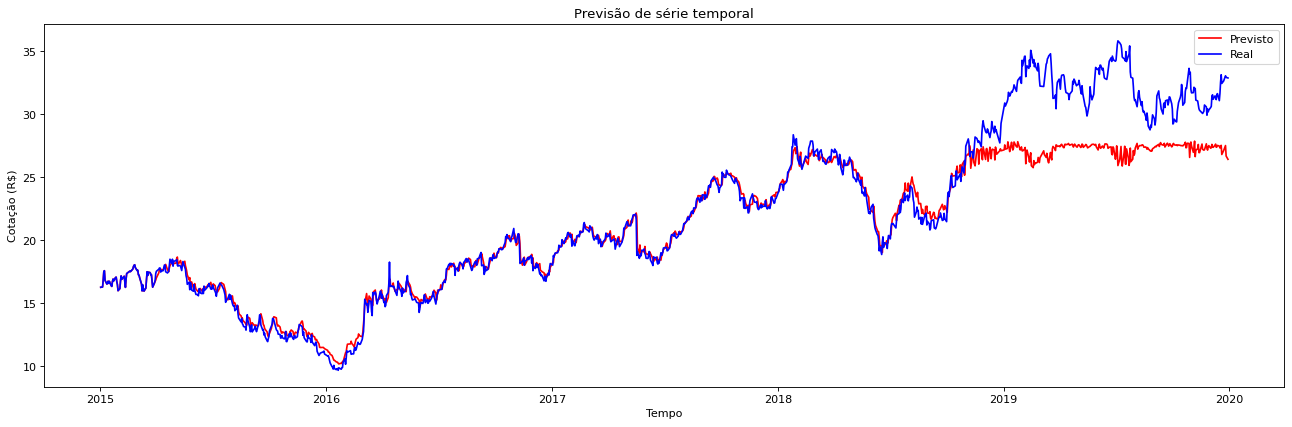

In [178]:
allTargetData = np.vstack((dataset[:training_data_len, 0:1], dataset[training_data_len:, 0:1]))
training_predicted = regressor.predict(X_train)
volume = dataset[:len(X_train), 1:]
training_predicted = np.column_stack((training_predicted, volume))
training_predicted = sc.inverse_transform(training_predicted)
allForecastedData = np.vstack((dataset[0:window, 0:1], training_predicted[:,0:1], predicted[:,0:1]))
# date = df['DATA']
date = df.index

figure(figsize=(20, 6), dpi=80)
plt.plot(date, allForecastedData, color = 'red', label = 'Previsto')
plt.plot(date, allTargetData, color = 'blue', label = 'Real')
plt.title('Previsão de série temporal')
plt.xlabel('Tempo')
plt.ylabel('Cotação (R$)')
plt.legend()
plt.show()

In [179]:
rmse = math.sqrt(mean_squared_error(dataset[training_data_len:, 0:1], predicted[:,0:1]))
print('RMSE: ', rmse)

RMSE:  4.305916369214846


In [180]:
mse = mean_squared_error(dataset[training_data_len:, 0:1], predicted[:,0:1])
print('MSE: ',mse)

MSE:  18.540915778672364


In [181]:
mape = np.mean(np.abs((dataset[training_data_len:, 0:1]-predicted[:,0:1]) /dataset[training_data_len:, 0:1])) * 100
print('MAPE: ',mape, '%')

MAPE:  11.184007334147365 %


In [182]:
print('R2: ', r2_score(predicted[:,0:1], dataset[training_data_len:, 0:1]))

R2:  -4.465713940864009
